Doğruluk Oranı: 0.4828068772491004

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.50      0.82      0.63      2552
           1       0.39      0.15      0.22      2075
           2       0.00      0.00      0.00       230
           3       0.00      0.00      0.00       101
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         1

    accuracy                           0.48      5002
   macro avg       0.11      0.12      0.11      5002
weighted avg       0.42      0.48      0.41      5002



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


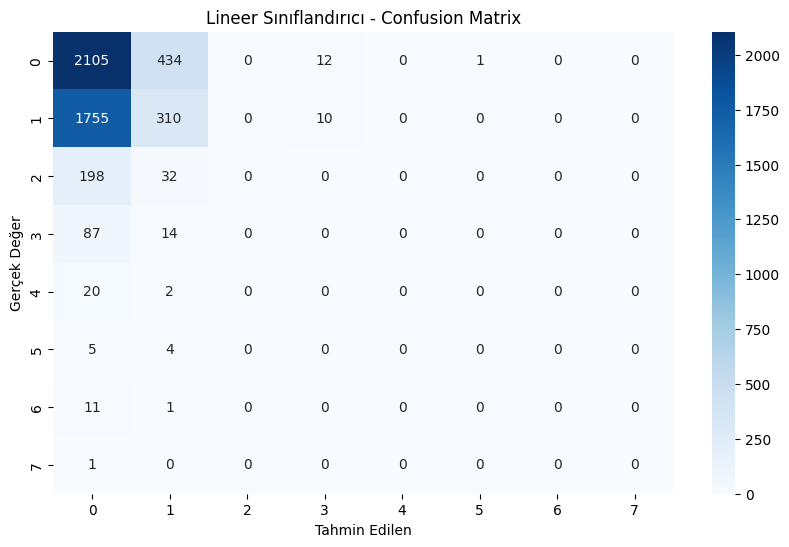

In [6]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Veri seti sütunlarını belirle
columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class']

# 2. Veriyi yükle
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
df = pd.read_csv(url, header=None, names=columns)

# 3. Girdi ve hedef sütunları ayır
X = df.drop("class", axis=1)
y = df["class"]

# 4. Eğitim ve test verisine ayır (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Özellikleri ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Lineer sınıflandırma modeli ile eğit
model = SGDClassifier(loss='hinge', random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# 7. Tahmin yap
y_pred = model.predict(X_test_scaled)

# 8. Başarıyı ölç
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 10. Görselleştir
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Lineer Sınıflandırıcı - Confusion Matrix")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.show()
